## Computer Vision Basics, Ideas & Fundamentals

Latest Computer Vision Models:

CNNs: Foundational for image tasks, excels in classification and object detection. (Developed by Yann LeCun and others, 1980s-1990s)

ViT: Uses transformer architecture for images, capturing long-range dependencies effectively. (Google Research, 2020)

YOLO: Real-time object detection, predicts bounding boxes from full images instantly. (Joseph Redmon et al., 2016)

ResNet: Deep networks with residual learning, solving degradation issues in training. (Microsoft Research, 2015)

Mask R-CNN: Adds segmentation masks to object detection for detailed object delineation. (Facebook AI Research, 2017)

DINOv2: Self-supervised transformer, learns from unlabeled data for versatile applications. (Meta AI, 2023)

SAM: Flexible segmentation model, handles diverse segmentation tasks with various prompts. (Meta AI, 2023)

Florence: Foundation model integrating visual-language data, versatile across multiple tasks. (Microsoft, 2021)

CLIP: Learns image-text relationships, enabling zero-shot classification through descriptions. (OpenAI, 2021)

DETR: Simplifies detection pipeline using transformers, making object detection more efficient. (Facebook AI Research, 2020)


**1. Vision Transformer (ViT)**: Developed by Google Research in 2020, Vision Transformer (ViT) brought transformers to image recognition by treating images as sequences of patches, similar to words in NLP tasks.

Datasets: ViT was pre-trained on large-scale datasets like ImageNet-21k and JFT-300M, with JFT-300M containing over 300 million labeled images.

Interesting Facts: ViT models outperformed CNNs on large datasets but needed substantial data to excel, demonstrating that transformers could match and surpass CNN performance in vision tasks.

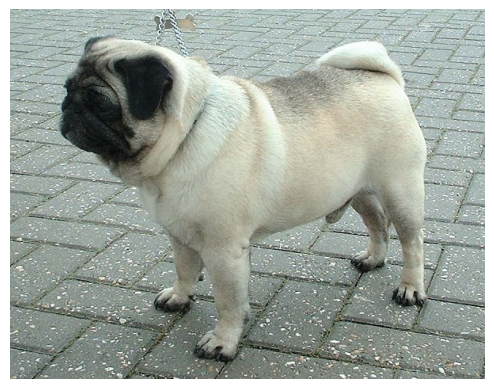

Predicted class: pug, pug-dog
Confidence: 84.70%
Error fetching the image: 404 Client Error: Not Found for url: https://upload.wikimedia.org/wikipedia/commons/6/6d/Golden_Retriever_2.jpg


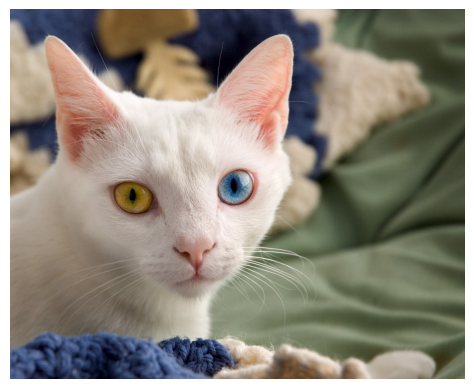

Predicted class: Egyptian cat
Confidence: 63.12%
Error fetching the image: 404 Client Error: Not Found for url: https://upload.wikimedia.org/wikipedia/commons/2/27/Beagle_puppy_sitting_on_grass.jpg
Error fetching the image: 404 Client Error: Not Found for url: https://upload.wikimedia.org/wikipedia/commons/1/1e/Labrador_Retriever_yellow_dog.jpg


In [8]:
# Install necessary libraries
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image, UnidentifiedImageError
import requests
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Load the Vision Transformer model and feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

# Define a helper function to preprocess, predict, and display the image
def classify_and_display_image(image_url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36'}

    try:
        # Load image with User-Agent header
        response = requests.get(image_url, headers=headers, stream=True)
        response.raise_for_status()  # Check for request issues
        image = Image.open(response.raw)

        # Display the image
        plt.imshow(image)
        plt.axis('off')
        plt.show()

        # Preprocess image
        inputs = feature_extractor(images=image, return_tensors="pt")

        # Predict image class
        with torch.no_grad():
            outputs = model(**inputs)

        # Get predicted class label and confidence
        logits = outputs.logits
        probabilities = F.softmax(logits, dim=-1)
        predicted_class_idx = logits.argmax(-1).item()
        confidence = probabilities[0, predicted_class_idx].item()
        predicted_label = model.config.id2label[predicted_class_idx]

        print(f"Predicted class: {predicted_label}")
        print(f"Confidence: {confidence:.2%}")

    except UnidentifiedImageError:
        print("Error: Unable to identify the image file format. Check the image URL.")
    except requests.RequestException as e:
        print(f"Error fetching the image: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# List of image URLs
image_urls = [
    'https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg',  # Pug
    'https://upload.wikimedia.org/wikipedia/commons/6/6d/Golden_Retriever_2.jpg',  # Golden Retriever
    'https://upload.wikimedia.org/wikipedia/commons/a/a3/June_odd-eyed-cat.jpg',  # Odd-eyed cat (blue eye)
    'https://upload.wikimedia.org/wikipedia/commons/2/27/Beagle_puppy_sitting_on_grass.jpg',  # Beagle puppy
    'https://upload.wikimedia.org/wikipedia/commons/1/1e/Labrador_Retriever_yellow_dog.jpg'  # Labrador Retriever
]

# Classify and display each image
for url in image_urls:
    classify_and_display_image(url)

Error fetching the image: 404 Client Error: Not Found for url: https://upload.wikimedia.org/wikipedia/commons/3/3f/Famous_Eiffel_Tower_View.jpg
Error fetching the image: 404 Client Error: Not Found for url: https://upload.wikimedia.org/wikipedia/commons/6/6e/Lincoln_Memorial_in_Washington_D.C.jpg
Error fetching the image: 404 Client Error: Not Found for url: https://upload.wikimedia.org/wikipedia/commons/4/44/Rome_Colosseum.jpg
Error fetching the image: 404 Client Error: Not Found for url: https://upload.wikimedia.org/wikipedia/commons/0/0d/Empire_State_Building_New_York.jpg


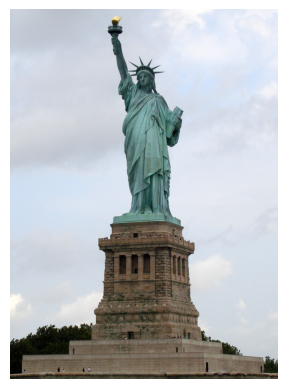

Extracted feature vector shape: torch.Size([1, 1000])
Sample features (first 5 values): tensor([ 0.5791,  1.3136, -0.5158,  0.3932, -0.5156])


In [18]:
# Install necessary libraries
import timm
import torch
import torchvision.transforms as transforms
from PIL import Image, UnidentifiedImageError
import requests
import matplotlib.pyplot as plt

# Load the Vision Transformer (ViT) model from timm
model = timm.create_model('vit_base_patch16_224', pretrained=True)  # ViT model; pretrained weights
model.eval()  # Set model to evaluation mode

# Define a transformation to preprocess images for ViT
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224, model input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define a helper function to extract features and display the image
def extract_and_display_features(image_url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36'}

    try:
        # Load image with User-Agent header
        response = requests.get(image_url, headers=headers, stream=True)
        response.raise_for_status()  # Check for request issues
        image = Image.open(response.raw)

        # Display the image
        plt.imshow(image)
        plt.axis('off')
        plt.show()

        # Preprocess image
        image = transform(image).unsqueeze(0)  # Add batch dimension

        # Extract features
        with torch.no_grad():
            features = model(image)

        # Display feature vector shape and sample values
        print(f"Extracted feature vector shape: {features.shape}")
        print(f"Sample features (first 5 values): {features[0, :5]}")

    except UnidentifiedImageError:
        print("Error: Unable to identify the image file format. Check the image URL.")
    except requests.RequestException as e:
        print(f"Error fetching the image: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Updated list of image URLs (non-animal images)
image_urls = [
    'https://upload.wikimedia.org/wikipedia/commons/3/3f/Famous_Eiffel_Tower_View.jpg',  # Eiffel Tower
    'https://upload.wikimedia.org/wikipedia/commons/6/6e/Lincoln_Memorial_in_Washington_D.C.jpg',  # Lincoln Memorial
    'https://upload.wikimedia.org/wikipedia/commons/4/44/Rome_Colosseum.jpg',  # Colosseum
    'https://upload.wikimedia.org/wikipedia/commons/0/0d/Empire_State_Building_New_York.jpg',  # Empire State Building
    'https://upload.wikimedia.org/wikipedia/commons/a/a1/Statue_of_Liberty_7.jpg'  # Statue of Liberty
]

# Extract and display features for each image
for url in image_urls:
    extract_and_display_features(url)

In [39]:
import cv2
import torch
import torchvision.transforms as transforms
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import matplotlib.pyplot as plt
import requests
import os
import torch.nn.functional as F
import warnings

# Suppress warnings about future deprecation
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the ViT model and image processor
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")
image_processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
model.eval()

# Define a transformation to preprocess frames for ViT
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224, model input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Function to download a video from a URL
def download_video(url, filename):
    response = requests.get(url, stream=True, verify=False)  # Disable SSL verification
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            for chunk in response.iter_content(chunk_size=1024):
                f.write(chunk)
        print(f"Downloaded {filename}")
    else:
        print(f"Failed to download video. Status code: {response.status_code}")

# Function to process a video and predict each frame with confidence
def predict_video(video_path, skip_frames=30, max_frames=100):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if video opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    frame_count = 0  # Initialize frame counter
    processed_frames = 0  # Track the number of processed frames

    while processed_frames < max_frames:
        # Read a frame from the video
        ret, frame = cap.read()

        # Break the loop if no frames left
        if not ret:
            break

        # Skip frames to reduce the number of predictions (e.g., process every nth frame)
        if frame_count % skip_frames != 0:
            frame_count += 1
            continue

        # Convert the frame from BGR to RGB and to PIL format
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_pil = Image.fromarray(frame_rgb)

        # Preprocess the frame
        inputs = image_processor(images=frame_pil, return_tensors="pt")

        # Predict the class for the frame
        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits
            probabilities = F.softmax(logits, dim=-1)
            predicted_class_idx = logits.argmax(-1).item()
            predicted_label = model.config.id2label[predicted_class_idx]
            confidence = probabilities[0, predicted_class_idx].item()

        # Display the frame with prediction and confidence
        plt.imshow(frame_rgb)
        plt.title(f"Prediction: {predicted_label} ({confidence:.2%} confidence)")
        plt.axis("off")
        plt.show()

        # Increment frame counters
        frame_count += 1
        processed_frames += 1

    # Release the video capture object
    cap.release()
    cv2.destroyAllWindows()

# Alternative video URL (NASA Apollo 11 Moon Landing)
video_url = 'https://download.blender.org/peach/bigbuckbunny_movies/big_buck_bunny_480p_surround-fix.avi'

video_filename = 'sample_video.avi'

# Download the video if not already present
if not os.path.exists(video_filename):
    download_video(video_url, video_filename)

# Predict on the downloaded video with confidence scores and frame limit
predict_video(video_filename, skip_frames=80, max_frames=30)  # Process every 30th frame, max 20 frames


Output hidden; open in https://colab.research.google.com to view.

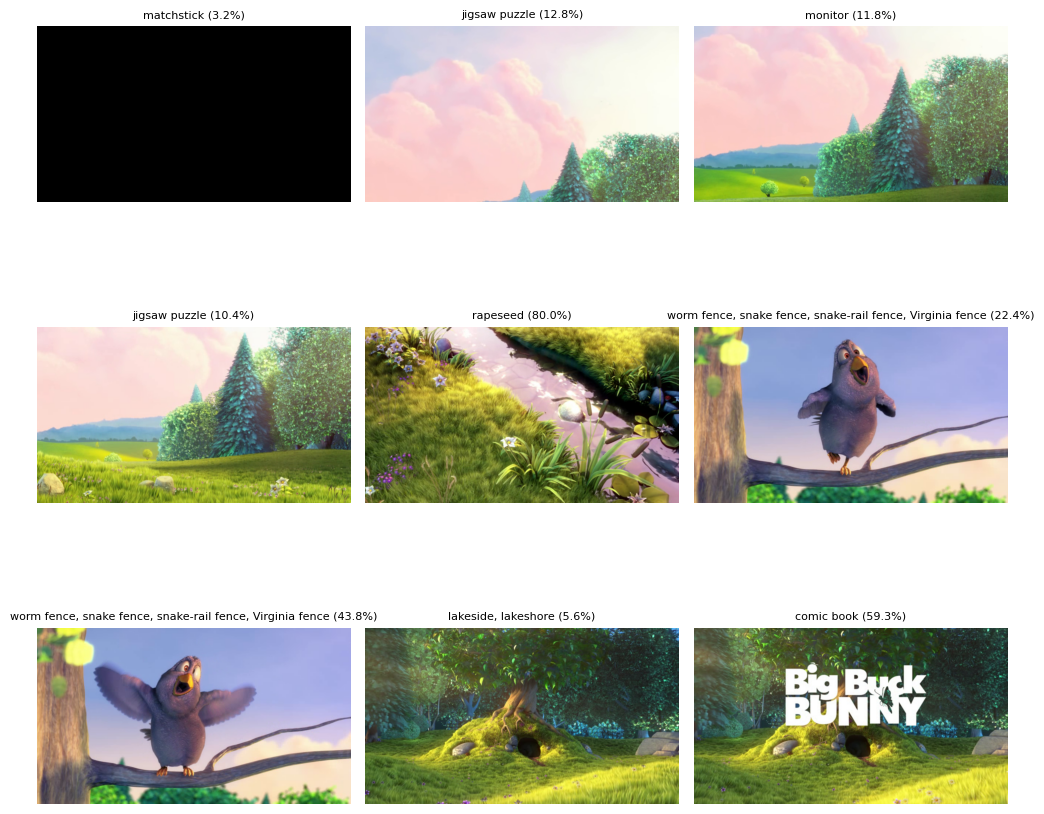

In [41]:
import cv2
import torch
import torchvision.transforms as transforms
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import matplotlib.pyplot as plt
import requests
import os
import torch.nn.functional as F
import warnings

# Suppress warnings about future deprecation
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the ViT model and image processor
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")
image_processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
model.eval()

# Define a transformation to preprocess frames for ViT
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224, model input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Function to download a video from a URL
def download_video(url, filename):
    response = requests.get(url, stream=True, verify=False)  # Disable SSL verification
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            for chunk in response.iter_content(chunk_size=1024):
                f.write(chunk)
        print(f"Downloaded {filename}")
    else:
        print(f"Failed to download video. Status code: {response.status_code}")

# Function to process a video, collect frames with predictions, and display in a grid
def predict_video(video_path, skip_frames=30, max_frames=9):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if video opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    frame_count = 0  # Initialize frame counter
    processed_frames = 0  # Track the number of processed frames
    frames_with_info = []  # Store frames with predictions and confidence

    while processed_frames < max_frames:
        # Read a frame from the video
        ret, frame = cap.read()

        # Break the loop if no frames left
        if not ret:
            break

        # Skip frames to reduce the number of predictions (e.g., process every nth frame)
        if frame_count % skip_frames != 0:
            frame_count += 1
            continue

        # Convert the frame from BGR to RGB and to PIL format
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_pil = Image.fromarray(frame_rgb)

        # Preprocess the frame
        inputs = image_processor(images=frame_pil, return_tensors="pt")

        # Predict the class for the frame
        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits
            probabilities = F.softmax(logits, dim=-1)
            predicted_class_idx = logits.argmax(-1).item()
            predicted_label = model.config.id2label[predicted_class_idx]
            confidence = probabilities[0, predicted_class_idx].item()

        # Store the frame with its prediction and confidence score
        frames_with_info.append((frame_rgb, predicted_label, confidence))

        # Increment frame counters
        frame_count += 1
        processed_frames += 1

    # Release the video capture object
    cap.release()
    cv2.destroyAllWindows()

    # Display all frames in a grid
    display_frames_grid(frames_with_info)

# Function to display frames in a single grid with smaller images and font
def display_frames_grid(frames_with_info):
    num_frames = len(frames_with_info)
    grid_size = int(num_frames ** 0.5)  # Calculate grid size (e.g., 3x3 for 9 frames)
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))  # Smaller figure size

    for i, (frame, label, confidence) in enumerate(frames_with_info):
        row = i // grid_size
        col = i % grid_size
        ax = axes[row, col]
        ax.imshow(frame)
        ax.set_title(f"{label} ({confidence:.1%})", fontsize=8)  # Smaller font size
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Alternative video URL (NASA Apollo 11 Moon Landing)
video_url = 'https://download.blender.org/peach/bigbuckbunny_movies/big_buck_bunny_480p_surround-fix.avi'

video_filename = 'sample_video.avi'

# Download the video if not already present
if not os.path.exists(video_filename):
    download_video(video_url, video_filename)

# Predict on the downloaded video with confidence scores and frame limit
predict_video(video_filename, skip_frames=80, max_frames=9)  # Process every 80th frame, max 9 frames

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL

Grossglockner is 3700M above the sea level, located in Austria which is one of the highest mountain in Europe.
Image Shape: (500, 500, 3)


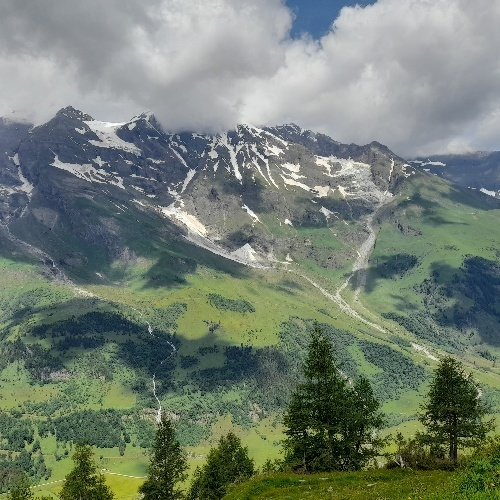

In [ ]:
import cv2
import numpy as np
from IPython.display import Image as IPImage, display

# Re-load the image as a NumPy array using cv2
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

print("Grossglockner is 3700M above the sea level, located in Austria which is one of the highest mountain in Europe.")
print('Image Shape:',image.shape)

# Check if the image is loaded correctly
if isinstance(image, np.ndarray):
    # Resize the image to 800x800 if loaded correctly
    image_resized = cv2.resize(image, (500, 500))

    # Save the resized image to a temporary file and display
    temp_resized_path = '/content/temp_resized_image_display.jpg'
    cv2.imwrite(temp_resized_path, image_resized)
    display(IPImage(filename=temp_resized_path))
else:
    print("Failed to load image as a NumPy array. Check file format and path.")


In [9]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# #image = cv2.imread('Nature_MyPics/Gross_Nature3.jpg')

# image = image_resized

# #plt.imshow(image)
# #plt.title('Image in BGR Format')
# #plt.show()

# # Convert the image to RGB, from it default BGR
# RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # Convert the image to grayscale because the kernel applies to single channel
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# #gray_image = image

# # Define a 3x3 kernel (filter) for edge detection
# kernel = np.array([[-1, -1, -1],
#                    [-1,  8, -1],
#                    [-1, -1, -1]])

# # Apply the kernel to the grayscale image using the filter2D function, which performs convolution
# convolved_image = cv2.filter2D(RGB_image, -1, kernel)

# # Display the original and convolved image
# plt.figure(figsize=(14, 8))

# print("Grossglockner is 3700M above the sea level, located in Austria which is one of the highest mountain in Europe.")
# print('Image Shape:',image.shape)

# plt.subplot(1, 3, 1)
# plt.title('Grossglockner - Original (RGB)')
# plt.imshow(RGB_image, cmap='gray')

# plt.subplot(1, 3, 2)
# plt.title('BGR Format')
# plt.imshow(gray_image, cmap='gray')

# plt.subplot(1, 3, 3)
# plt.title('Convolved Image')
# plt.imshow(convolved_image, cmap='gray')

# plt.show()

Lets try different varieties of filter operations:

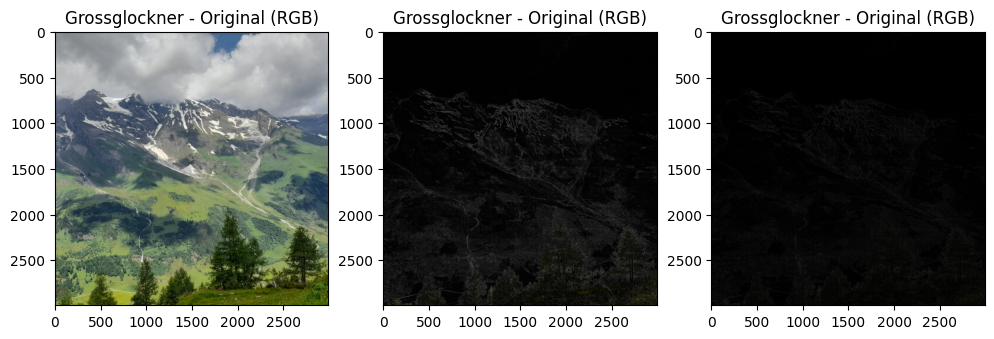

In [ ]:
identity_kernel = np.array([[0, 0, 0],
                   [0,  1, 0],
                   [0, 0, 0]])

edge_detecting_kernel = np.array([[-1, -1, -1],
                  [-1,  8, -1],
                  [-1, -1, -1]])


laplacian_kernel = np.array([[ 0,  1,  0],
          [ 1, -4,  1],
          [ 0,  1,  0]])

convolved_image = cv2.filter2D(RGB_image, -1, identity_kernel)
edge_convolved_image = cv2.filter2D(RGB_image, -1, edge_detecting_kernel)
laplacian_kernel_image = cv2.filter2D(RGB_image, -1, laplacian_kernel)


# Display the original and convolved image
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Grossglockner - Original (RGB)')
plt.imshow(convolved_image, cmap='gray')


plt.subplot(1, 3, 2)
plt.title('Grossglockner - Original (RGB)')
plt.imshow(edge_convolved_image, cmap='gray')


plt.subplot(1, 3, 3)
plt.title('Grossglockner - Original (RGB)')
plt.imshow(laplacian_kernel_image, cmap='gray')


Pixel Values:

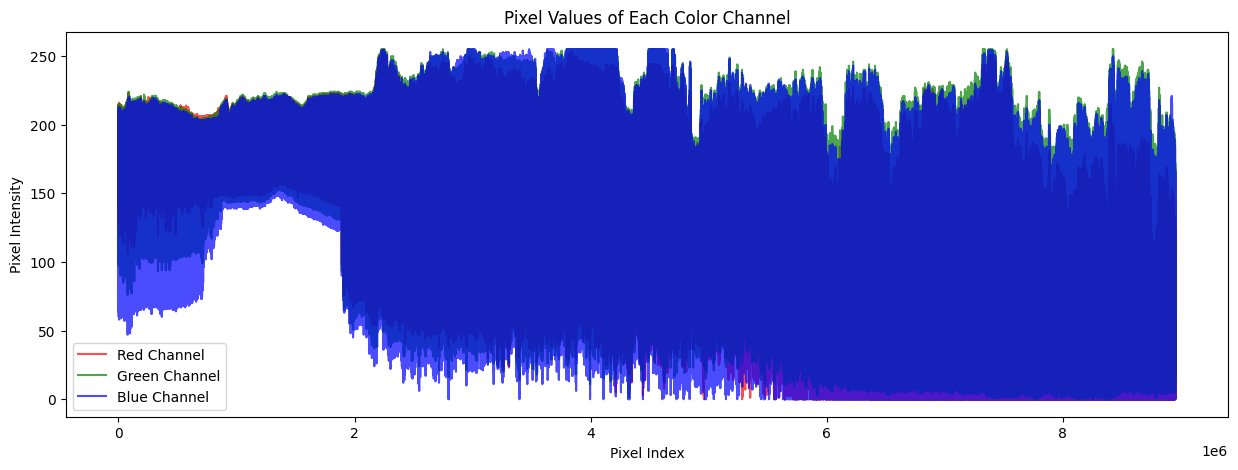

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'image' is your original image array with shape (2992, 2992, 3)

# Flatten each channel
red_channel = image[:, :, 0].flatten()
green_channel = image[:, :, 1].flatten()
blue_channel = image[:, :, 2].flatten()

# Plot each channel
plt.figure(figsize=(15, 5))
plt.plot(red_channel, color='red', label='Red Channel', alpha=0.7)
plt.plot(green_channel, color='green', label='Green Channel', alpha=0.7)
plt.plot(blue_channel, color='blue', label='Blue Channel', alpha=0.7)
plt.title("Pixel Values of Each Color Channel")
plt.xlabel("Pixel Index")
plt.ylabel("Pixel Intensity")
plt.legend()
plt.show()

Extract the pixel value for first 10000 pixels:

In [10]:
# import matplotlib.pyplot as plt

# # Extract the first 1000 pixels' RGB values
# red = image.reshape(-1, 3)[:10000, 0]
# green = image.reshape(-1, 3)[:10000, 1]
# blue = image.reshape(-1, 3)[:10000, 2]

# # Plotting
# plt.figure(figsize=(15, 5))
# plt.plot(red, color='red', label='Red')
# plt.plot(green, color='green', label='Green')
# plt.plot(blue, color='blue', label='Blue')
# plt.title('RGB Values for the First 1000 Pixels')
# plt.xlabel('Pixel Index')
# plt.ylabel('Pixel Value')
# plt.legend()
# plt.show()


My Input Shape Here is: (2992, 2992, 3)

Converting a 2D or 3D image into a 1D array is a process known as flattening. Flattening combines all the pixels of the image into a single array. In the case of a color image with shape (2992, 2992, 3), where the dimensions represent the height, width, and color channels (RGB) respectively, we can flatten it into a 1D array where each set of three values represents the RGB values of each pixel.

In [ ]:
import numpy as np

# Assuming 'image' is your NumPy array with the shape (2992, 2992, 3)
flattened_image = image.flatten()

# The shape of 'flattened_image' will now be (2992*2992*3,)
print(flattened_image.shape)


(26856192,)


In [ ]:
# plt.figure(figsize=(10, 4))
# plt.plot(flattened_image[:10000])  # Plotting the first 10000 values for visibility
# plt.title("Pixel Value Distribution of Flattened Image")
# plt.xlabel("Pixel index")
# plt.ylabel("Pixel value")
# plt.show()


Konigssee is a mountain lake 600 m above the sea level, located in Germany.
Image Shape: (2992, 2992, 3)


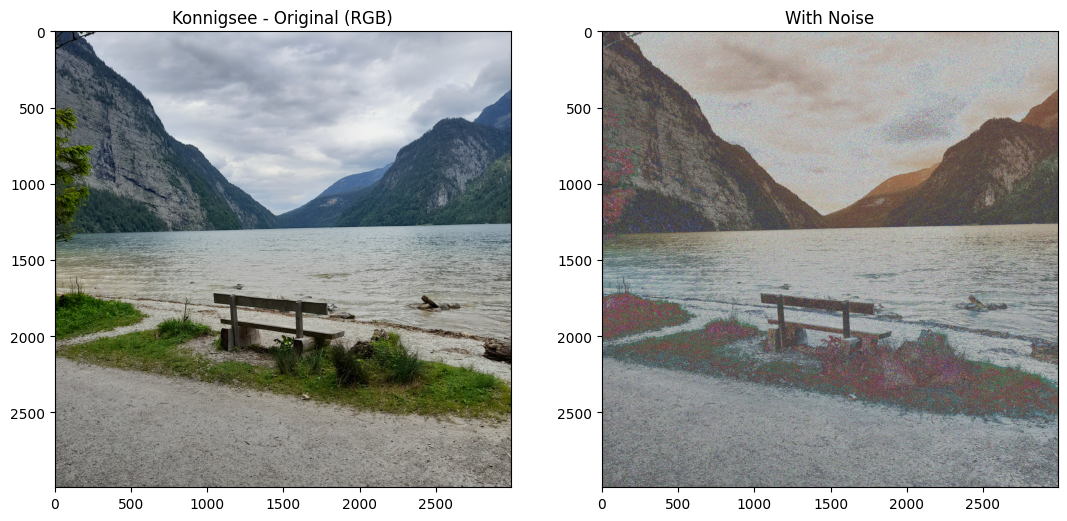

In [ ]:
# Load your image (make sure to provide the correct path to your image file)
K_image = cv2.imread('Nature_MyPics/K_Nature3.jpg')

print("Konigssee is a mountain lake 600 m above the sea level, located in Germany.")
print('Image Shape:',K_image.shape)

# Convert the image to RGB, from it default BGR
Original_image = cv2.cvtColor(K_image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale because the kernel applies to single channel
gray_image = cv2.cvtColor(K_image, cv2.COLOR_BGR2GRAY)


mu, sigma = 0, 35
noise = np.random.normal(mu, sigma, K_image.shape)
gausi_Image = np.uint8(K_image + noise)


# Display the original and convolved image
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.title('Konnigsee - Original (RGB)')
plt.imshow(Original_image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('With Noise')
plt.imshow(gausi_Image, cmap='gray')
#plt.colorbar()
plt.show()

The choice of parameters for the mean (mu) and standard deviation (sigma) when adding Gaussian noise to an image depends on the specific application and the desired effect. Let's compare the two sets of parameters you mentioned:

Mean = 0, Standard Deviation = 35 (mu = 0, sigma = 35):

Mean (0): The noise values are centered around 0, meaning the noise will equally likely increase or decrease the pixel values. This keeps the overall brightness of the image relatively unchanged on average.
Standard Deviation (35): A smaller standard deviation means that most of the noise values will be close to the mean (0), with only a few outliers. This results in a relatively small perturbation in pixel values, adding subtle noise to the image.

## MSE To Compare Two Images

Mean Squared Error: 3281.1173968371986


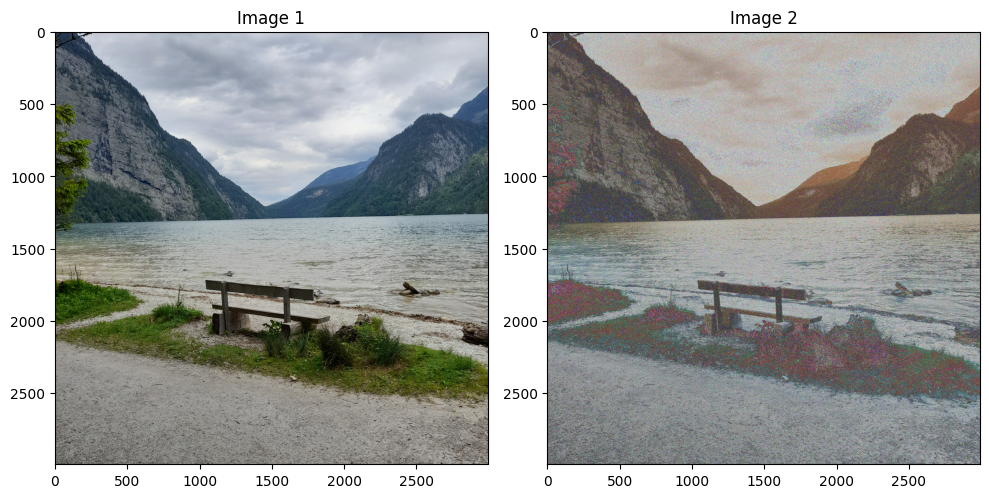

In [ ]:
from skimage.metrics import mean_squared_error
from skimage.io import imread
import matplotlib.pyplot as plt

#image_path1 = 'path/to/your/first/image.jpg'
#image_path2 = 'path/to/your/second/image.jpg'

# Load the images
#image1 = imread(Original_image)
#image2 = imread(gausi_Image)

# Compute MSE
mse = mean_squared_error(Original_image, gausi_Image)

# Print MSE
print(f"Mean Squared Error: {mse}")

# Display images for comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(Original_image, cmap=plt.cm.gray)
ax[0].set_title('Image 1')

ax[1].imshow(gausi_Image, cmap=plt.cm.gray)
ax[1].set_title('Image 2')

plt.tight_layout()
plt.show()


Cross Correlation & Autocorrelation:

Purpose: Cross-correlation is used to find the degree of similarity between two signals by sliding one signal over the other and computing the sum of their pointwise products at each position. It's widely used in signal processing to find the time delay between two signals, among other applications.

Correlation Purpose: In the context of 1D data, when people refer to "correlation", they often mean autocorrelation, which measures how a signal correlates with itself over time (or another dimension). It's used to find repeating patterns or periodic signals in data, like identifying the fundamental frequency in a musical note.





[ 0  0 -1 -3 -5 -4  0  4  5  3  1  0  0]
[ 0  0  1  4 10 16 19 16 10  4  1  0  0]


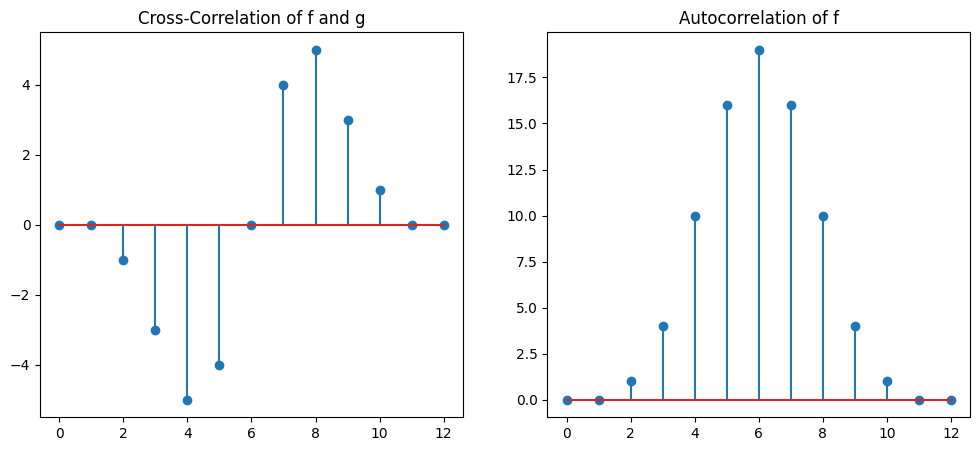

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example signals
f = np.array([0, 1, 2, 3, 2, 1, 0])
g = np.array([0, 1, 1, 0, -1, -1, 0])

# Cross-correlation
cross_corr = np.correlate(f, g, "full")
print(cross_corr)

# Autocorrelation of f
auto_corr = np.correlate(f, f, "full")
print(auto_corr)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.stem(cross_corr)
plt.title("Cross-Correlation of f and g")

plt.subplot(1, 2, 2)
plt.stem(auto_corr)
plt.title("Autocorrelation of f")

plt.show()


In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt


# from google.colab import drive
# drive.mount('/content/drive')

# image_path = '/content/drive/MyDrive/Colab Notebooks/Nature_MyPics/Gross_Nature3.jpg'

# # Load the image in BGR format
# image = cv2.imread(image_path)

# # Convert the image from BGR to RGB
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # Display the image in RGB format
# plt.imshow(image_rgb)
# plt.title('Image in RGB Format')
# plt.axis('off')  # Optional: Hide axes for a cleaner look
# plt.show()

In [ ]:
# import os

# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)


# image_path = '/content/drive/MyDrive/Colab Notebooks/Nature_MyPics/Gross_Nature3.jpg'
# #/content/drive/MyDrive/Colab Notebooks/Nature_MyPics/Gross_Nature3.jpg

# # Check if the file exists at the specified path
# if os.path.exists(image_path):
#     print("File exists.")
# else:
#     print("File not found. Check the file path.")


In [ ]:
import cv2

# Load the image
image = cv2.imread(image_path)

if image is not None:
    print("Image loaded successfully.")
    print("Image shape:", image.shape)
else:
    print("Image loading failed.")


Image loaded successfully.
Image shape: (2992, 2992, 3)


In [ ]:
# import cv2
# import numpy as np
# from IPython.display import Image as IPImage, display

# # Re-load the image as a NumPy array using cv2
# image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# # Check if the image is loaded correctly
# if isinstance(image, np.ndarray):
#     # Resize the image to 800x800 if loaded correctly
#     image_resized = cv2.resize(image, (500, 500))

#     # Save the resized image to a temporary file and display
#     temp_resized_path = '/content/temp_resized_image_display.jpg'
#     cv2.imwrite(temp_resized_path, image_resized)
#     display(IPImage(filename=temp_resized_path))
# else:
#     print("Failed to load image as a NumPy array. Check file format and path.")


In [ ]:
# from IPython.display import Image as IPImage, display

# # Display the image directly from the file path
# display(IPImage(filename=image_path))


# Basic Object Detection

# 1. Using Yolo5: Yolo5s, Yolo5m.

Normally Yolo will not detect any nature scenes since its trained on different set of objects.

"YOLO models are typically trained on datasets like COCO, which contains 80 classes (e.g., person, car, dog, bicycle)"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-29 Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


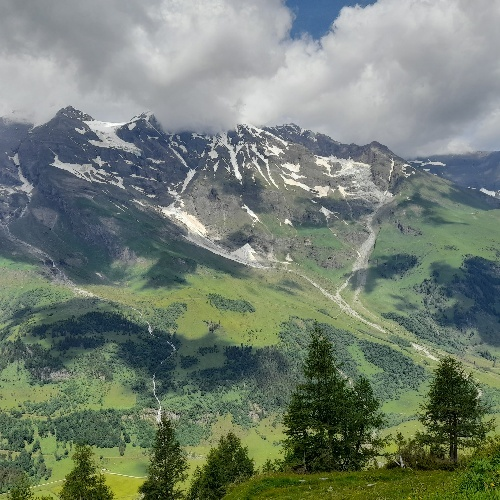

image 1/1: 500x500 (no detections)
Speed: 12.9ms pre-process, 679.5ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)


In [ ]:
import torch
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the YOLOv5 model with a lower confidence threshold
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model.conf = 0.1  # Lowering the confidence threshold to capture more possible detections

# Set the path for the resized image (assuming temp_resized_path is defined as your resized image path)
temp_resized_path = '/content/temp_resized_image_display.jpg'

# Run inference on the image
results = model(temp_resized_path)

# Display and print the results
results.show()  # Show the detected objects
results.print()  # Print out detected classes and their confidence levels


#2. DeepLab segmentation model

In [ ]:
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

# Load the DeepLab segmentation model
segmentation_model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)
segmentation_model.eval()

image_path = '/content/temp_resized_image_display.jpg'  # Update this path if needed

# Load and preprocess the image
input_image = Image.open(image_path).convert('RGB')  # Ensure it's in RGB format
preprocess = transforms.Compose([
    transforms.Resize(512),  # Resize to a standard input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)  # Create a batch with a single image

# Run the model on the image
with torch.no_grad():
    output = segmentation_model(input_batch)['out'][0]
output_predictions = output.argmax(0)  # Get the predicted class for each pixel

# Check for unique classes in the output (to confirm detection)
unique_classes = torch.unique(output_predictions)
print("Unique classes in output:", unique_classes)

# If only the background class (0) is detected, provide guidance
if len(unique_classes) == 1 and unique_classes[0].item() == 0:
    print("Only the background class was detected. No objects were found.")
else:
    print("Objects detected in the image.")

# Define a color palette for visualizing segmentation results
# Simple palette with 21 colors for demo purposes; you can expand this for more classes
palette = np.array([
    [0, 0, 0], [128, 0, 0], [0, 128, 0], [128, 128, 0],
    [0, 0, 128], [128, 0, 128], [0, 128, 128], [128, 128, 128],
    [64, 0, 0], [192, 0, 0], [64, 128, 0], [192, 128, 0],
    [64, 0, 128], [192, 0, 128], [64, 128, 128], [192, 128, 128],
    [0, 64, 0], [128, 64, 0], [0, 192, 0], [128, 192, 0],
    [0, 64, 128]
])

# Map each class in the output to a color in the palette
output_colors = palette[output_predictions.cpu().numpy() % palette.shape[0]]

# Display the original image and the segmentation map side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Show the original image
ax1.imshow(input_image)
ax1.set_title('Original Image')
ax1.axis('off')

# Show the segmentation map
ax2.imshow(output_colors)
ax2.set_title('Segmentation Map')
ax2.axis('off')

plt.show()


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Unique classes in output: tensor([0])
Only the background class was detected. No objects were found.


#3. SegFormer model trained on ADE20K

Logits shape: torch.Size([1, 150, 160, 160])
Predicted shape: (160, 160)
Unique values in predicted output (classes): [ 2  4  9 13 16]
Segmentation map shape: (160, 160, 3)
Segmentation map unique colors: [[ 34 139  34]
 [128 128 128]
 [135 206 235]
 [139  69  19]
 [210 180 140]]


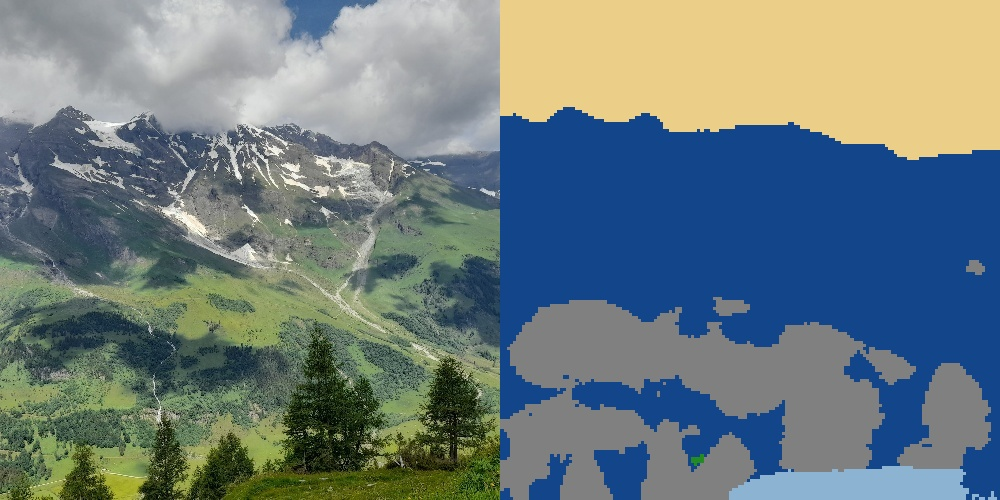

In [ ]:
import torch
from PIL import Image
import numpy as np
from transformers import SegformerImageProcessor, SegformerForSemanticSegmentation
import cv2
from IPython.display import Image as IPImage, display
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

# Step 1: Load the image processor and SegFormer model trained on ADE20K
image_processor = SegformerImageProcessor.from_pretrained("nvidia/segformer-b5-finetuned-ade-640-640")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b5-finetuned-ade-640-640")
model.eval()

# Step 2: Set the image path and load the image
image_path = '/content/temp_resized_image_display.jpg'  # Update path if necessary
input_image = Image.open(image_path).convert("RGB")

# Step 3: Preprocess the image
inputs = image_processor(images=input_image, return_tensors="pt")

# Step 4: Run inference with no gradients
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits  # Shape (1, num_classes, height, width)

# Step 5: Get class predictions for each pixel
predicted = logits.argmax(1)[0].cpu().numpy()  # Shape (height, width)

# Step 6: Debugging - Check output shapes and unique classes detected
print("Logits shape:", logits.shape)  # Expected shape: (1, num_classes, height, width)
print("Predicted shape:", predicted.shape)  # Expected shape: (height, width)
print("Unique values in predicted output (classes):", np.unique(predicted))

# Step 7: Define class labels and colors for ADE20K (simplified)
class_labels = {
    2: "sky",
    4: "road",
    9: "building",
    13: "tree",
    16: "mountain",
}

colors = {
    2: [135, 206, 235],   # Sky - Light Blue
    4: [128, 128, 128],   # Road - Gray
    9: [210, 180, 140],   # Building - Tan
    13: [34, 139, 34],    # Tree - Forest Green
    16: [139, 69, 19],    # Mountain - Brown
}

# Step 8: Apply color mapping to the segmentation output
segmentation_map = np.zeros((predicted.shape[0], predicted.shape[1], 3), dtype=np.uint8)
for class_id, color in colors.items():
    segmentation_map[predicted == class_id] = color  # Apply color to each class ID

# Debugging: Print segmentation map shape and unique colors
print("Segmentation map shape:", segmentation_map.shape)
print("Segmentation map unique colors:", np.unique(segmentation_map.reshape(-1, 3), axis=0))

# Step 9: Use OpenCV to display the original image and segmentation map

# Load the original image using OpenCV
original_image = cv2.imread(image_path)
original_image_resized = cv2.resize(original_image, (500, 500))

# Resize the segmentation map for easier viewing
segmentation_resized = cv2.resize(segmentation_map, (500, 500), interpolation=cv2.INTER_NEAREST)

# Concatenate original and segmentation map horizontally
combined_image = np.concatenate((original_image_resized, segmentation_resized), axis=1)

# Save the combined image for display
combined_image_path = '/content/combined_image_display.jpg'
cv2.imwrite(combined_image_path, combined_image)

# Display the combined image using IPython.display
display(IPImage(filename=combined_image_path))

# Step 10: Display the legend for class labels and colors
legend_patches = [Patch(color=np.array(color)/255, label=class_labels[class_id]) for class_id, color in colors.items()]

# Use matplotlib to display the legend separately
plt.figure(figsize=(3, 3))
plt.legend(handles=legend_patches, title="Detected Classes", loc='center', frameon=True)
plt.axis("off")
plt.show()

In [ ]:
4. VIT Model

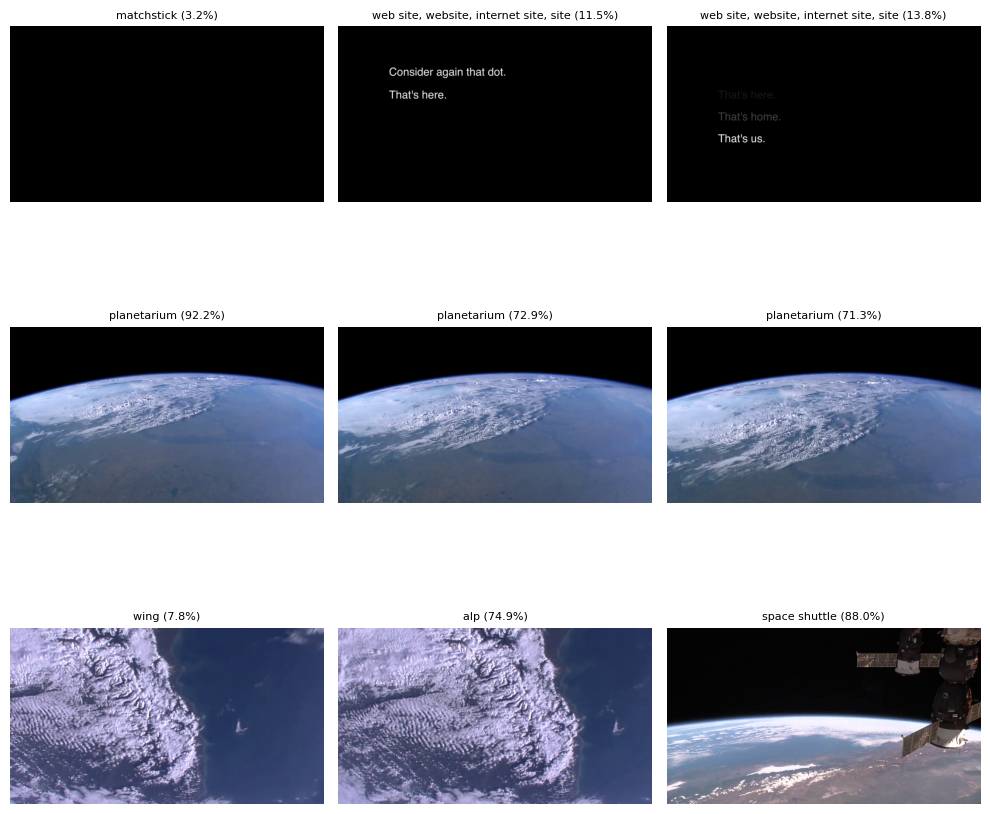

In [66]:
import cv2
import torch
import torchvision.transforms as transforms
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import matplotlib.pyplot as plt
import requests
import os
import torch.nn.functional as F
import warnings

# Suppress warnings about future deprecation
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the ViT model and image processor
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")
image_processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
model.eval()

# Define a transformation to preprocess frames for ViT
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224, model input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Function to download a video from a URL
def download_video(url, filename):
    response = requests.get(url, stream=True, verify=False)  # Disable SSL verification
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            for chunk in response.iter_content(chunk_size=1024):
                f.write(chunk)
        print(f"Downloaded {filename}")
    else:
        print(f"Failed to download video. Status code: {response.status_code}")

# Function to process a video, collect frames with predictions, and display in a grid
def predict_video(video_path, skip_frames=30, max_frames=9):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if video opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    frame_count = 0  # Initialize frame counter
    processed_frames = 0  # Track the number of processed frames
    frames_with_info = []  # Store frames with predictions and confidence

    while processed_frames < max_frames:
        # Read a frame from the video
        ret, frame = cap.read()

        # Break the loop if no frames left
        if not ret:
            break

        # Skip frames to reduce the number of predictions (e.g., process every nth frame)
        if frame_count % skip_frames != 0:
            frame_count += 1
            continue

        # Convert the frame from BGR to RGB and to PIL format
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_pil = Image.fromarray(frame_rgb)

        # Preprocess the frame
        inputs = image_processor(images=frame_pil, return_tensors="pt")

        # Predict the class for the frame
        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits
            probabilities = F.softmax(logits, dim=-1)
            predicted_class_idx = logits.argmax(-1).item()
            predicted_label = model.config.id2label[predicted_class_idx]
            confidence = probabilities[0, predicted_class_idx].item()

        # Store the frame with its prediction and confidence score
        frames_with_info.append((frame_rgb, predicted_label, confidence))

        # Increment frame counters
        frame_count += 1
        processed_frames += 1

    # Release the video capture object
    cap.release()
    cv2.destroyAllWindows()

    # Display all frames in a grid
    display_frames_grid(frames_with_info)

# Function to display frames in a single grid with smaller images and font
def display_frames_grid(frames_with_info):
    num_frames = len(frames_with_info)
    grid_size = int(num_frames ** 0.5)  # Calculate grid size (e.g., 3x3 for 9 frames)
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))  # Smaller figure size

    for i, (frame, label, confidence) in enumerate(frames_with_info):
        row = i // grid_size
        col = i % grid_size
        ax = axes[row, col]
        ax.imshow(frame)
        ax.set_title(f"{label} ({confidence:.1%})", fontsize=8)  # Smaller font size
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Alternative video URL (NASA Apollo 11 Moon Landing)
# video_url = 'https://archive.org/download/MarsRoverCuriosity/Mars_Rover_Curiosity.mp4'
# video_url = 'https://archive.org/download/ATripToTheMoon/ATripToTheMoon.mp4'
# video_url = 'https://archive.org/download/CharlieChaplinDayOut/CharlieChaplinDayOut_512kb.mp4'
# #video_url = 'https://download.blender.org/peach/bigbuckbunny_movies/big_buck_bunny_480p_surround-fix.avi'
# video_url = 'https://archive.org/download/ElephantsDream/ed_1024.mp4'
# video_url = 'https://archive.org/download/Apollo4SaturnVLaunch/Nasa_Apollo4_Saturn_V_Launch.mp4'
# video_url = 'https://archive.org/download/NASA-ISS-Earth-Views/NASA_ISS_Earth_Views.mp4'
# video_url = 'https://archive.org/download/yosemite/Yosemite.mp4'
# video_url = 'https://archive.org/download/UnderwaterReefLife/Underwater_Reef_Life.mp4'
# video_url = 'https://archive.org/download/RainforestWildlife/Rainforest_Wildlife.mp4'

# video_url = 'https://archive.org/download/DiscoveryFlyaroundOfInternationalSpaceStation/STS_119_HD_ISS_FLyaround_Sped_Up_512kb.mp4'
video_url = 'https://archive.org/download/EarthViewsFromTheInternationalSpaceStation/Chris%20Getteau%20-%20HDEV%20Video_20190429_Youtube.ia.mp4'


# <video class="jw-video jw-reset" tabindex="-1" disableremoteplayback="" webkit-playsinline="" playsinline="" style="" src="/download/EarthViewsFromTheInternationalSpaceStation/Chris%20Getteau%20-%20HDEV%20Video_20190429_Youtube.ia.mp4"></video>

#<video class="jw-video jw-reset" tabindex="-1" disableremoteplayback="" webkit-playsinline="" playsinline="" style="object-fit: fill;" src="/download/DiscoveryFlyaroundOfInternationalSpaceStation/STS_119_HD_ISS_FLyaround_Sped_Up_512kb.mp4"></video>



video_filename = 'sample_video_v5.avi'

# video_filename = 'sample_video.avi'

# Download the video if not already present
if not os.path.exists(video_filename):
    download_video(video_url, video_filename)

# Predict on the downloaded video with confidence scores and frame limit
predict_video(video_filename, skip_frames=300, max_frames=9)  # Process every 80th frame, max 9 frames

In [ ]:
!pip install transformers
!pip install timm  # Required for some segmentation models
!pip install torch torchvision
!pip install transformers torch torchvision


In [ ]:
!pip install timm

In [ ]:
!pip install opencv-python transformers timm torch

In [ ]:
# Install YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt